# **<font color='#facb4b'>APRENDIZAGEM NÃO SUPERVISIONADA</font>**

**<font color='#facb4b'>PROBLEMA</font>**: 

HELP International é uma ONG humanitária internacional que está comprometida em combater a pobreza e fornecer às pessoas de países atrasados comodidades básicas e alívio durante o tempo de desastres e calamidades naturais.

A HELP International conseguiu arrecadar cerca de US$ 10 milhões. Agora, o CEO da ONG precisa distribuir esse dinheiro de forma estratégica e eficaz para os países mais carentes de ajuda humanitária.

**<font color='#facb4b'>OBJETIVO</font>**: Categorizar os países carentes de recursos humanitários com base em fatores socioeconômicos e de saúde, com o intuito de contribuir com a tomada de decisão do CEO.


**<font color='#facb4b'>METODOLOGIA</font>**: A metodologia utilizada para o desenvolvimento do projeto consiste nas seguintes etapas: análise exploratória dos dados, pré-processamento dos dados e clusterização com o K-Means. O valor de inércia do K-means será avaliado sem e com a redução de dimensionalidade (PCA). Para determinar o número de clusters (K) ideal para o K-means, será utilizado o método Elbow. A visulização Silhouette também será utilizada, pois ela exibe o coeficiente de silhueta para cada amostra por cluster, visualizando quais clusters são densos e quais não são. Isso é particularmente útil para determinar o desequilíbrio do cluster ou para selecionar um valor para K.

### **<font color='#facb4b'>IMPORTANDO AS BIBLIOTECAS</font>** 

In [530]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import plotly.express as px
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer


import warnings
warnings.filterwarnings("ignore")

### **<font color='#facb4b'>LENDO A BASE DE DADOS</font>** 

In [531]:
dt = pd.read_csv("Country-data.csv")
dt.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


### **<font color='#facb4b'>VERIFICANDO A DIMENSÃO DA BASE DE DADOS</font>** 

In [532]:
dt.shape

(167, 10)

* **<font color='#3CB371'>A base de dados possui 167 linhas e 10 variáveis</font>**

### **<font color='#facb4b'>DESCRIÇÃO DAS FEATURES</font>** 
1. **<font color='#3CB371'>country</font>**: Nome do país.
2. **<font color='#3CB371'>child_mort</font>**: Morte de crianças menores de 5 anos por 1000 nascidos vivos.
3. **<font color='#3CB371'>exports</font>**: Exportações de bens e serviços per capita. Dado como % do PIB per capita.
4. **<font color='#3CB371'>health</font>**: Gasto total em saúde per capita. Dado como % do PIB per capita.
5. **<font color='#3CB371'>imports</font>**: Importações de bens e serviços per capita. Dado como % do PIB per capita.
6. **<font color='#3CB371'>income</font>**: Renda líquida por pessoa.
7. **<font color='#3CB371'>inflation</font>**: A medida da taxa de crescimento anual do PIB Total.
8. **<font color='#3CB371'>life_expec</font>**: O número médio de anos que uma criança recém-nascida viveria se os padrões atuais de mortalidade permanecessem os mesmos.
9. **<font color='#3CB371'>total_fer</font>**: O número de filhos que nasceriam de cada mulher se as taxas atuais de fertilidade por idade permanecerem as mesmas.
10. **<font color='#3CB371'>gdpp</font>**: PIB per capita. Calculado como o PIB total dividido pela população total.

### **<font color='#facb4b'>VERIFICANDO OS TIPOS DE DADOS</font>** 

In [533]:
dt.dtypes

country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object

* **<font color='#3CB371'>Os dados são do tipo discreto e contínuo.</font>** 
* **<font color='#3CB371'>A variável "country" é categórica nominal, isso indica que as demais variáveis são caraterísticas que descrevem cada país.</font>**

### **<font color='#facb4b'>VERIFICANDO A DISTRIBUIÇÃO DA CLASSE ALVO</font>** 

In [534]:
dt["country"].value_counts()

country
Afghanistan    1
Morocco        1
Myanmar        1
Namibia        1
Nepal          1
              ..
Georgia        1
Germany        1
Ghana          1
Greece         1
Zambia         1
Name: count, Length: 167, dtype: int64

### **<font color='#facb4b'>VERIFICANDO VALORES AUSENTES</font>** 

In [535]:
dt.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

* **<font color='#3CB371'>A base de dados não possui valores ausentes</font>**

### **<font color='#facb4b'>VERIFICANDO VALORES DUPLICADOS</font>** 

In [536]:
dt.duplicated().sum()

0

* **<font color='#3CB371'>A base de dados não possui valores duplicados</font>**

### **<font color='#facb4b'>ESTATÍSTICA DESCRITIVA DOS DADOS</font>** 

In [537]:
dt.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


* **<font color='#3CB371'>Os dados não estão na mesma escala. Portanto, é necessário normalizar os dados.</font>**

### **<font color='#facb4b'>DISTRIBUIÇÃO DOS DADOS</font>** 

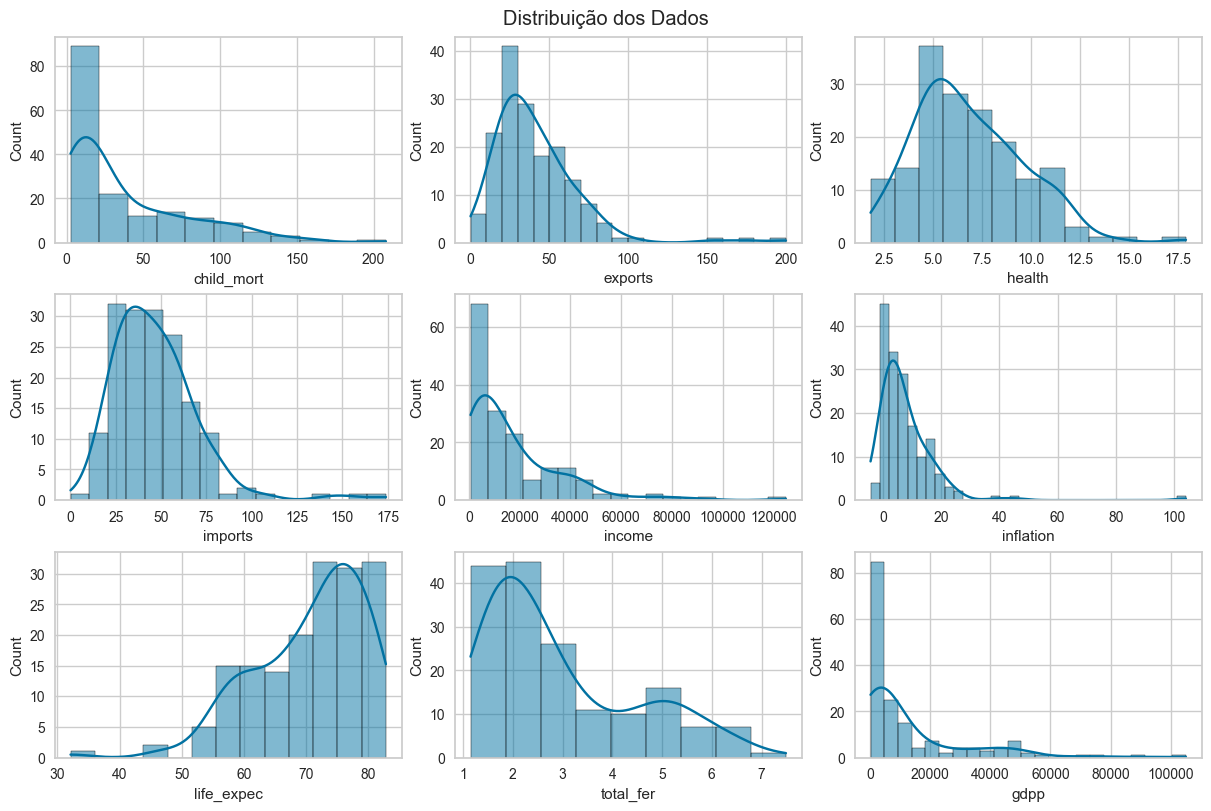

In [538]:
cols = dt.select_dtypes(exclude='object').columns.tolist()

fig, ax = plt.subplots(nrows=3,ncols=3, figsize=(12,8), constrained_layout=True)
ax = ax.flatten()
plt.suptitle("Distribuição dos Dados")
for x, i in enumerate(cols):
    sns.histplot(x=dt[i], ax=ax[x], kde=True)

* **<font color='#3CB371'>Os gráficos mostram que os dados não apresentam uma distribuição normal.</font>**

### **<font color='#facb4b'>DETECTANDO OUTLIERS</font>** 

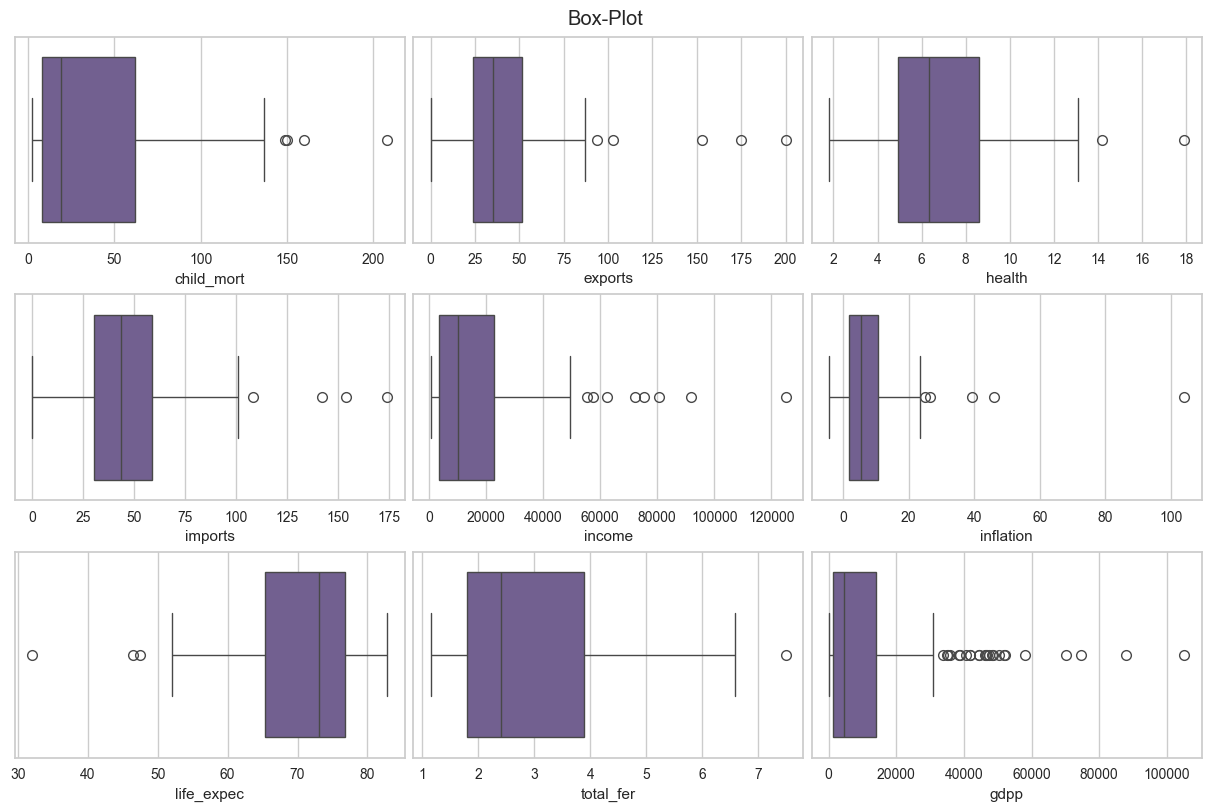

In [539]:
cols = dt.select_dtypes(exclude='object').columns.tolist()

fig, ax = plt.subplots(nrows=3,ncols=3, figsize=(12,8), constrained_layout=True)
ax = ax.flatten()
plt.suptitle("Box-Plot")
for x, i in enumerate(cols):
    sns.boxplot(x=dt[i], ax=ax[x], palette=['#705898'])

* **<font color='#3CB371'>Os gráficos de Box-Plot mostram que existem valores discrepantes em todas as variáveis númericas. </font>**
* **<font color='#3CB371'>No entanto, esses valores pertencem a países diferentes. Portanto, é natural que exista valores que fujam da normalidade.</font>**

### **<font color='#facb4b'>CORRELAÇÃO</font>** 

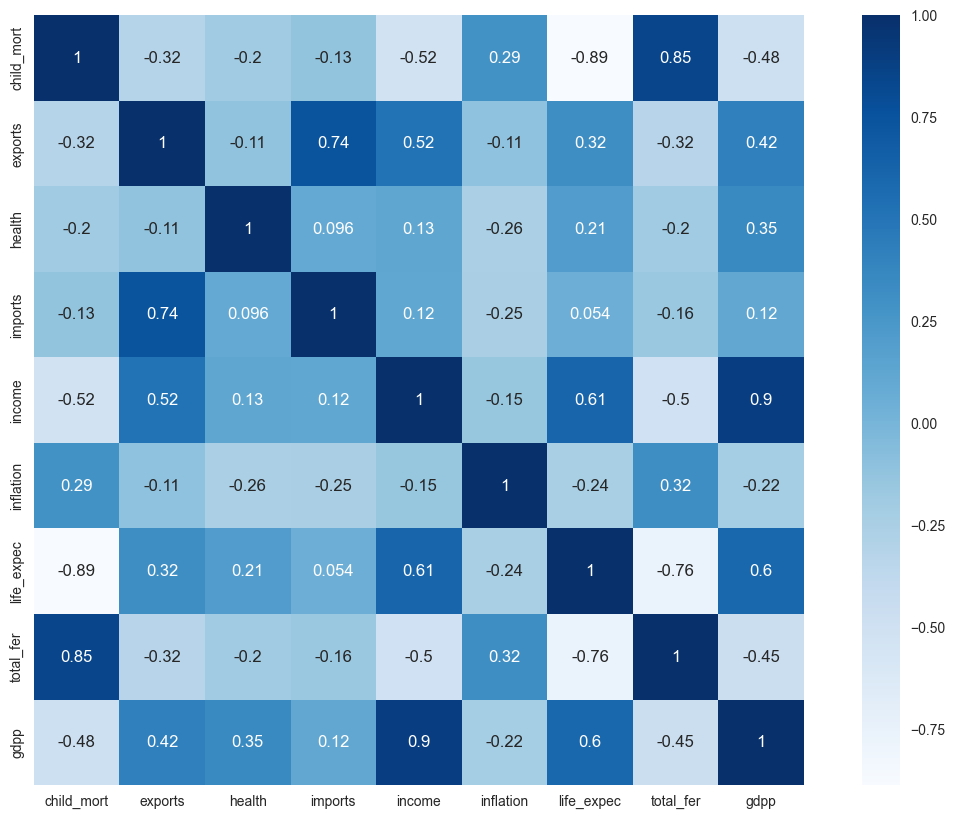

In [540]:
plt.figure(figsize=(15,10))
sns.heatmap(dt[cols].corr(), annot=True, square=True, cmap="Blues")
plt.show()

**Observações**
1. **<font color='#3CB371'>child_mort</font>** e  **<font color='#3CB371'>total_fer</font>** tem relação negativa forte com o **<font color='#3CB371'>gdpp (PIB)</font>**, isso indica que quando PIB cresce a mortalidade infantil e o número de filhos diminuiu e quando o PIB diminiu a mortalidade infantil aumenta, assim como, o número de filhos que nasce de cada mulher.
2. **<font color='#3CB371'>exports, health, income</font>** e **<font color='#3CB371'>life_expec</font>** tem uma relação positiva com o **<font color='#3CB371'>gdpp (PIB)</font>**, isso indica que na medida que o PIB cresce esses fatores também crescem juntos.
3. **<font color='#3CB371'>child_mort</font>** tem relação positiva com **<font color='#3CB371'>total_fer</font>**, indicando que quando o número de filhos por mulher crescre a mortalidade infantil também cresce.
4. **<font color='#3CB371'>child_mort</font>** tem relação negativa com **<font color='#3CB371'>life_expec</font>**, isso indica que quando a expectativa de vida cresce, a mortalidade infantil diminiu.
5. **<font color='#3CB371'>life_expec</font>** tem relação negativa com **<font color='#3CB371'>total_fer</font>**, quando a expectativa de vida cresce o número de filhos por mulher diminui.
6. **<font color='#3CB371'>income</font>** tem relação positiva com **<font color='#3CB371'>life_expec</font>**, quando a rende líquida por pessoa aumenta a expectativa de vida também aumenta.
7. **<font color='#3CB371'>exports</font>** tem relação positiva com **<font color='#3CB371'>income</font>**, quando as exportações do país aumenta a renda líquida de cada pessoa também aumenta.


* Constata-se que os fatores **<font color='#3CB371'>child_mort, total_fer, exports, health, income e life_expec</font>** desempenham um papel vital no status socioeconômico de um país. 
* Com base nisso, a decisão de escolher um país que necessita de ajuda também é baseado nesse fatores. 

### **<font color='#facb4b'>VISUALIZANDO OS 5 PRINCIPAIS PAÍSES QUE APRESENTAM VALORES ALTOS PARA TODAS AS VARIÁVEIS</font>** 

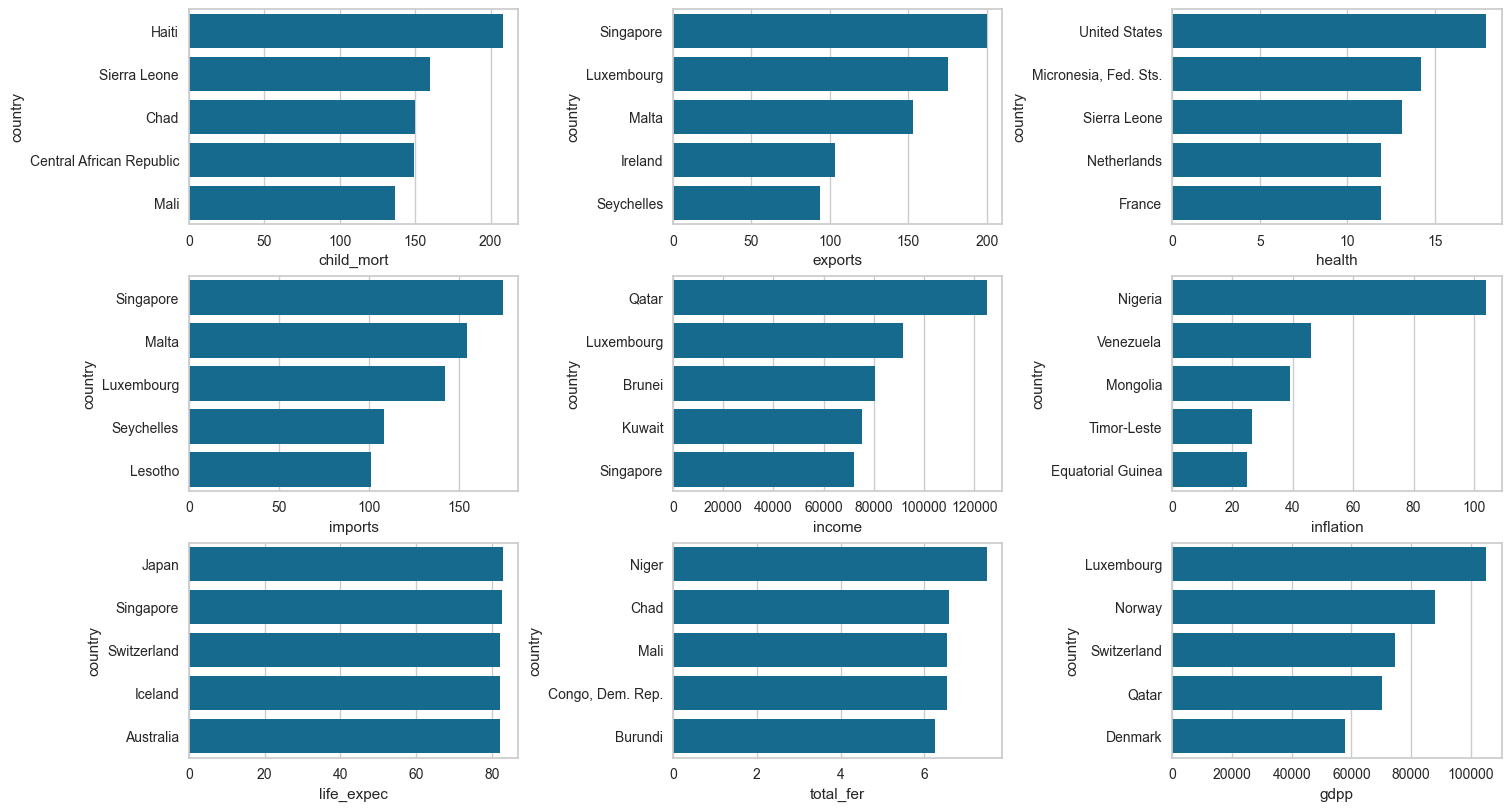

In [541]:
cols = dt.drop(['country'], axis=1).columns.tolist()

fig, ax = plt.subplots(nrows=3,ncols=3, figsize=(15,8), constrained_layout=True)
ax = ax.flatten()
for x, i in enumerate(cols):
    dt_new = dt[['country', i]].sort_values(by=i,ascending=False)
    dt_new = dt_new.iloc[0:5,:]
    sns.barplot(data=dt_new, x=i, y='country', ax=ax[x])
    

### **<font color='#facb4b'>VISUALIZANDO OS 5 PRINCIPAIS PAÍSES QUE APRESENTAM VALORES BAIXOS PARA TODAS AS VARIÁVEIS</font>** 

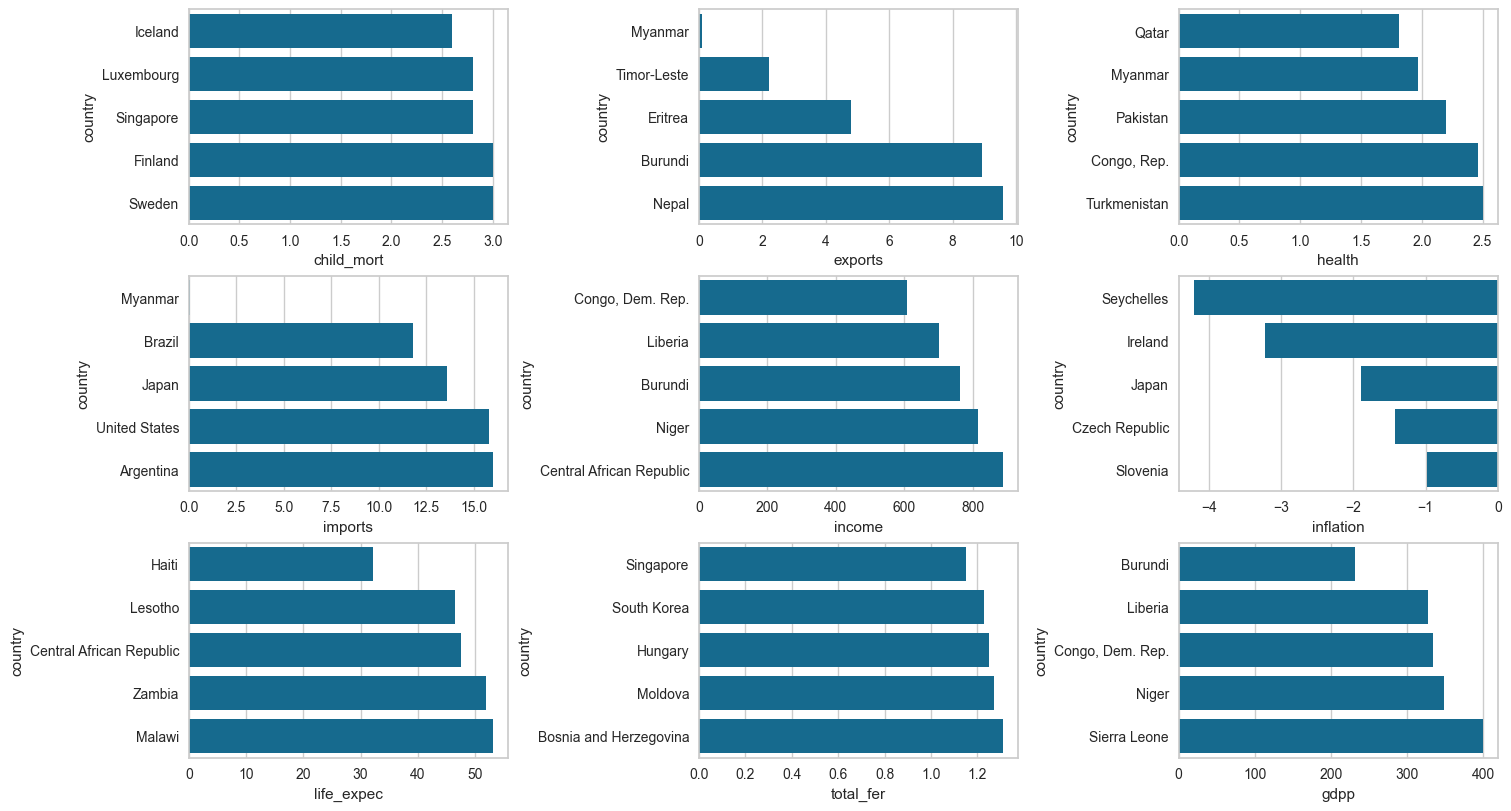

In [542]:
cols = dt.drop(['country'], axis=1).columns.tolist()

fig, ax = plt.subplots(nrows=3,ncols=3, figsize=(15,8), constrained_layout=True)
ax = ax.flatten()
for x, i in enumerate(cols):
    dt_new = dt[['country', i]].sort_values(by=i,ascending=True)
    dt_new = dt_new.iloc[0:5,:]
    sns.barplot(data=dt_new, x=i, y='country', ax=ax[x])
    

### **<font color='#facb4b'>NORMALIZANDO OS DADOS</font>**

In [543]:
X = dt.drop(columns=["country"], axis=1).values

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [544]:
cols = dt.drop(columns=["country"], axis=1).columns.tolist()

dt_scaled = pd.DataFrame(data = X, columns = cols)
dt_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


## **<font color='#facb4b'>K-MEANS CLUSTERING</font>**

**<font color='#3CB371'>Método Elbow</font>**

O método "cotovelo" é usado para selecionar o número ideal de clusters, ajustando o modelo com um intervalo de valores para K.

class yellowbrick.cluster.elbow.KElbowVisualizer(estimator, ax=None, k=10, metric='distortion', distance_metric='euclidean', timings=True, locate_elbow=True, **kwargs)

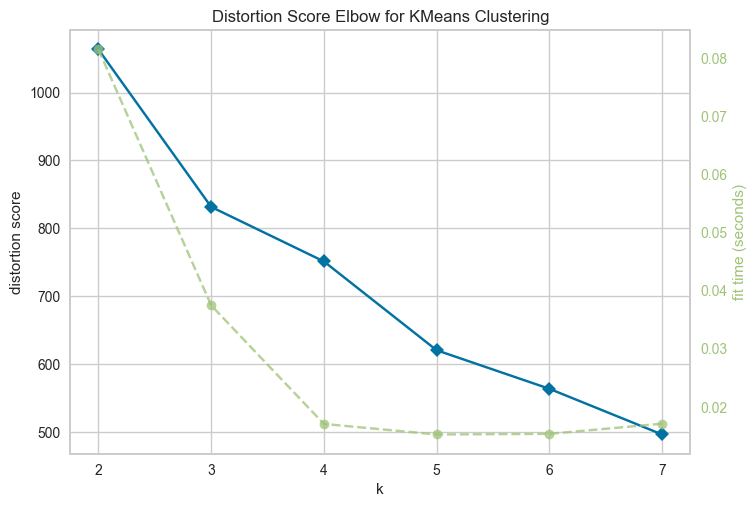

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [545]:
visualizer = KElbowVisualizer(KMeans(random_state=42), k=(2, 8))
visualizer.fit(X)        
visualizer.show()    

* **<font color='#3CB371'>Para determinar o número ótimo de clusters, temos que selecionar o valor de k no "cotovelo", ou seja, o ponto após o qual a distorção/inércia começa a diminuir de forma linear.</font>** 
* **<font color='#3CB371'>Normalmente escolhemos o ponto em que as melhorias no desempenho começam a ficar estagnadas ou piores.</font>**
* **<font color='#3CB371'>Assim, para os dados fornecidos, concluímos que o número ótimo de clusters para os dados é 3.</font>**

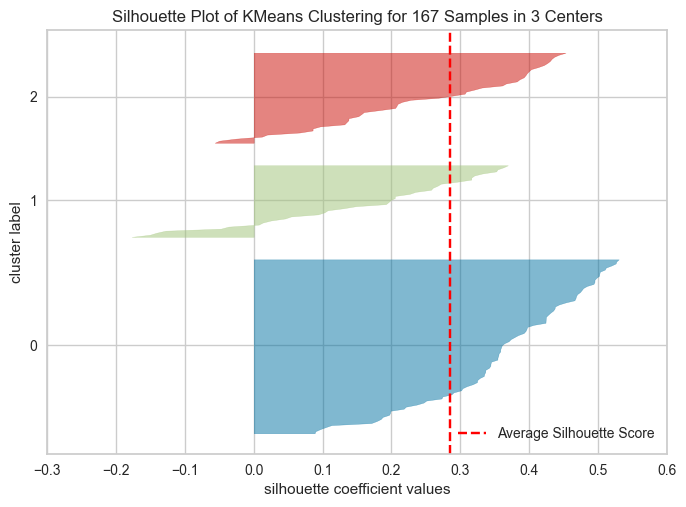

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 167 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [546]:
visualizer = SilhouetteVisualizer(KMeans(3, random_state=42), colors='yellowbrick')
visualizer.fit(X)       
visualizer.show()       

* **<font color='#3CB371'>Por padrão, o parâmetro de pontuação metric é definido como distortion, que calcula a soma das distâncias quadradas de cada ponto até seu centro atribuído.</font>**
* **<font color='#3CB371'>No entanto, duas outras métricas também podem ser usadas com KElbowVisualizer– silhouette e calinski_harabasz.</font>**
* **<font color='#3CB371'>A pontuação silhouette calcula o Coeficiente de Silhueta médio de todas as amostras, enquanto a pontuação calcula calinski_harabasz a razão de dispersão entre e dentro dos clusters.</font>**
* **<font color='#3CB371'>Coeficiente de Silhueta.</font>**
* **<font color='#3CB371'>O melhor valor é 1 e o pior valor é -1.</font>**
* **<font color='#3CB371'>Valores próximos a 0 indicam clusters sobrepostos.</font>**
* **<font color='#3CB371'>Valores negativos geralmente indicam que uma amostra foi atribuída ao cluster errado, pois um cluster diferente é mais similar.</font>**
* **<font color='#3CB371'>Apontuação de silhueta para cada cluster está acima das pontuações de silhueta médias. Assim, pode-se selecionar o número ideal de clusters como 3.</font>**

### **<font color='#facb4b'>K-MEANS</font>**

In [547]:
kmeans = KMeans(n_clusters=3, random_state=42)
k_means = kmeans.fit(X)

print("{} \n{} \n{} \n{}".format(k_means.n_clusters, k_means.cluster_centers_ , k_means.labels_, k_means.inertia_))

3 
[[-0.39328196 -0.03058375 -0.20617903  0.01956247 -0.25093021 -0.00578315
   0.22676244 -0.40257862 -0.35583225]
 [-0.82744866  0.64507985  0.72741122  0.19063895  1.48424268 -0.48492064
   1.07957853 -0.79187687  1.61599536]
 [ 1.41356446 -0.45761494 -0.18789794 -0.18989721 -0.70783863  0.39898875
  -1.29703104  1.40287396 -0.61276131]] 
[2 0 0 2 0 0 0 1 1 0 0 1 0 0 0 1 0 2 0 0 0 0 0 1 0 2 2 0 2 1 0 2 2 0 0 0 2
 2 2 0 2 0 1 1 1 0 0 0 0 2 2 0 0 1 1 2 2 0 1 2 1 0 0 2 2 0 2 0 1 0 0 0 0 1
 1 1 0 1 0 0 2 2 1 0 2 0 0 2 2 0 0 1 0 2 2 0 0 2 1 2 0 0 0 0 0 0 2 0 2 0 1
 1 2 2 1 0 2 0 0 0 0 0 1 1 0 0 2 0 0 2 0 0 2 1 1 1 0 2 1 1 0 0 2 0 1 1 0 2
 0 2 2 0 0 0 0 2 0 1 1 1 0 0 0 0 0 2 2] 
831.5351582151586


In [548]:
dt_kmeans = dt.copy()
dt_kmeans["clusters"] = k_means.labels_
dt_kmeans.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0


### **<font color='#facb4b'>IDENTIFICANDO A PRIORIDADE DOS PAÍSES DE CADA CLUSTER</font>**

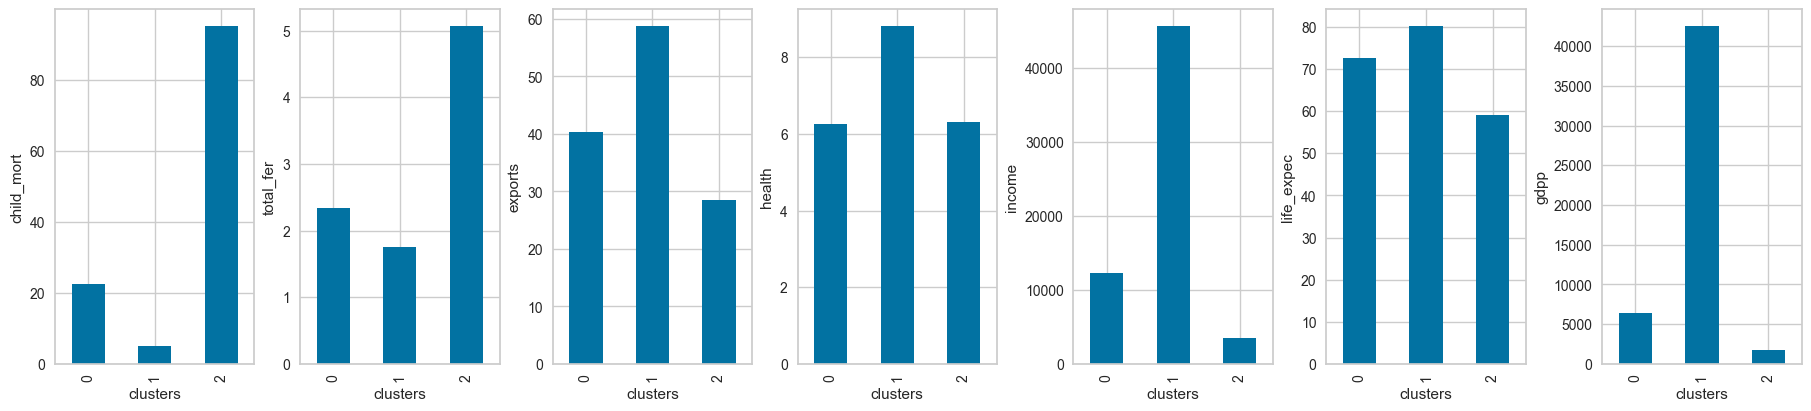

In [549]:
#cols = ["child_mort", "total_fer", "exports", "health", "income", "life_expec", "gdpp"]

fig, ax = plt.subplots(ncols=7, figsize=(18,4), constrained_layout=True)

dt_kmeans.groupby(['clusters'])["child_mort"].mean().T.plot(kind='bar', ax=ax[0], xlabel="clusters", ylabel="child_mort")
dt_kmeans.groupby(['clusters'])["total_fer"].mean().T.plot(kind='bar', ax=ax[1], xlabel="clusters", ylabel="total_fer")
dt_kmeans.groupby(['clusters'])["exports"].mean().T.plot(kind='bar', ax=ax[2], xlabel="clusters", ylabel="exports")
dt_kmeans.groupby(['clusters'])["health"].mean().T.plot(kind='bar', ax=ax[3], xlabel="clusters", ylabel="health")
dt_kmeans.groupby(['clusters'])["income"].mean().T.plot(kind='bar', ax=ax[4], xlabel="clusters", ylabel="income")
dt_kmeans.groupby(['clusters'])["life_expec"].mean().T.plot(kind='bar', ax=ax[5], xlabel="clusters", ylabel="life_expec")
dt_kmeans.groupby(['clusters'])["gdpp"].mean().T.plot(kind='bar', ax=ax[6], xlabel="clusters", ylabel="gdpp")

plt.show()

Com base nos principais fatores socieconômicos e de saúde, podemos observar, pelo gráfico, que os países do cluster 2 são os mais carentes de recursos humanitários.


Os países do cluster 2 são os que apresenta:
* O maior número de morte de crianças menores de 5 anos por 1000 nascidos vivos (child_mort)
* O maior número de filhos nascidos por cada mulher
* A menor taxa de exportação de bens e serviços
* A menor renda líquida por pessoa
* A menor expectativa de vida
* O menor PIB per Capita

Podemos ver claramente que os paises do cluster 1 possuem a maior taxa de exportação de bens e serviços, a maior renda líquida por pessoa, a maior taxa de expectativa de vida, o maior PIB per capita, etc.

### **<font color='#facb4b'>PRIORIDADE DOS PAÍSES</font>**

In [550]:
dt_kmeans["clusters_labels"] = dt_kmeans["clusters"].map({1: "Não Precisa de Ajuda", 2: 'Precisa de Ajuda', 0: 'Pode Precisar de Ajuda'})

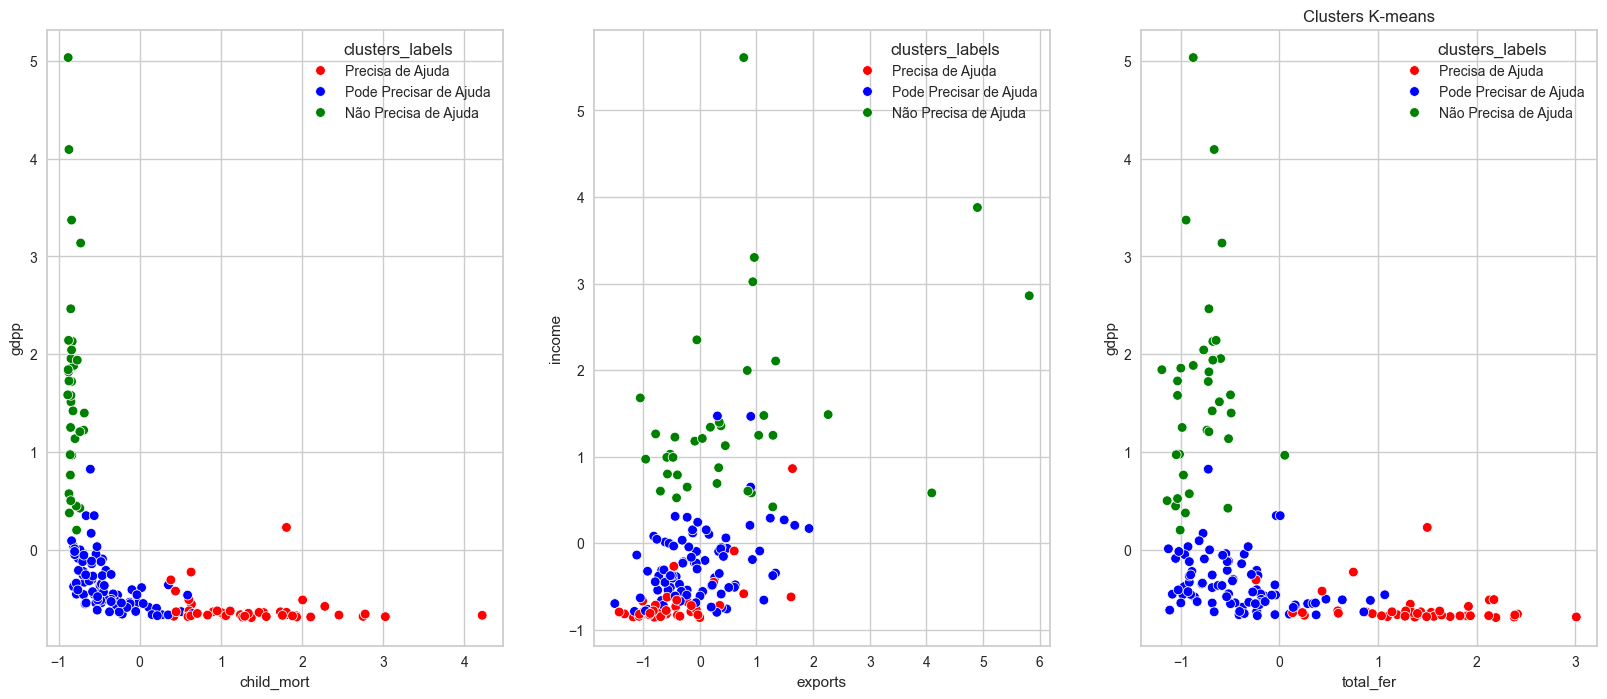

In [551]:
fig,ax=plt.subplots(nrows=1,ncols=3,figsize=(20,8))
sns.scatterplot(data=dt_scaled, x='child_mort', y='gdpp', hue=dt_kmeans["clusters_labels"], ax=ax[0], palette=["red", "blue", "green"])
sns.scatterplot(data=dt_scaled, x='exports', y='income', hue=dt_kmeans["clusters_labels"], ax=ax[1], palette=["red", "blue", "green"])
sns.scatterplot(data=dt_scaled, x='total_fer', y='gdpp', hue=dt_kmeans["clusters_labels"], ax=ax[2], palette=["red", "blue", "green"])
plt.title("Clusters K-means")
plt.show()

## **<font color='#facb4b'>K-MEANS CLUSTERING COM PCA</font>**

In [552]:
pca = PCA().fit(X)
pca.n_components_, pca.explained_variance_ratio_

(9,
 array([0.4595174 , 0.17181626, 0.13004259, 0.11053162, 0.07340211,
        0.02484235, 0.0126043 , 0.00981282, 0.00743056]))

**<font color='#3CB371'>A variação informa quanta informação pode ser atribuída a cada um dos componentes principais.</font>** 

**<font color='#3CB371'>Usando o atributo explained_variance_ratio_ , você pode ver que o primeiro componente principal contém 46% da variância, o segundo componente principal contém 17% da variância, o terceiro componente principal contém 13% da variância e o quarto componente principal contém 11% da variância. Juntos, os quatro componentes contêm 87% das informações.</font>**

**<font color='#3CB371'>Uma regra prática é preservar cerca de 80% da variância. Então, neste caso, decidimos manter 4 componentes.</font>**

### **<font color='#facb4b'>VARIÂNCIA DOS COMPONENTES</font>**

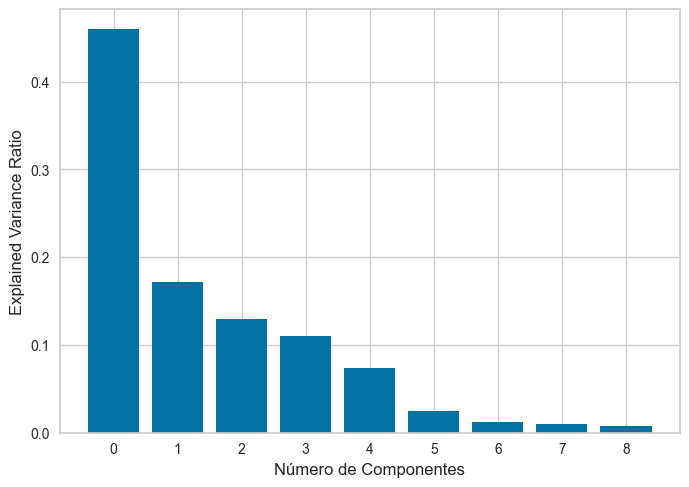

In [553]:
features = range(pca.n_components_) 
plt.bar(features, pca.explained_variance_ratio_)
plt.xticks(features)
plt.xlabel('Número de Componentes',fontsize=12)
plt.ylabel('Explained Variance Ratio',fontsize=12)
plt.show()

### **<font color='#facb4b'>VARIÂNCIA CUMULATIVA</font>**

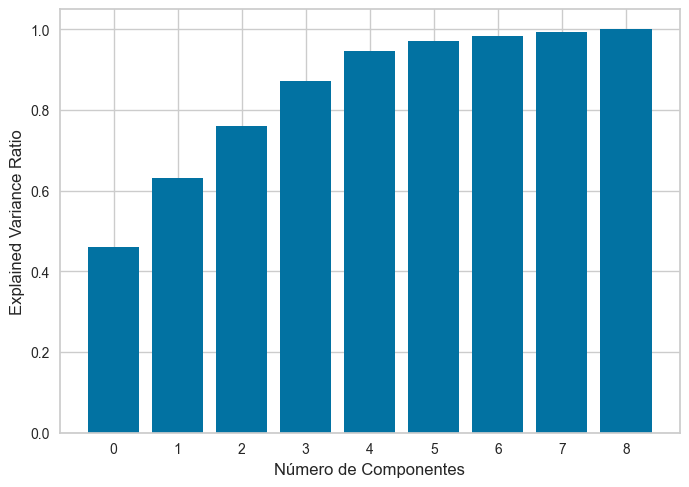

In [554]:
features = range(pca.n_components_) 
plt.bar(features, pca.explained_variance_ratio_.cumsum())
plt.xticks(features)
plt.xlabel('Número de Componentes',fontsize=12)
plt.ylabel('Explained Variance Ratio',fontsize=12)
plt.show()


### **<font color='#facb4b'>CALCULANDO AS PONTUAÇOES PARA TODOS OS COMPONENTES</font>**

In [555]:
principalComponentes = pca.fit_transform(X) # Calcula as pontuações para os componentes

dt_p = pd.DataFrame(principalComponentes)
dt_p = pd.concat([dt_p, dt[["country"]]], axis=1)
dt_p.head()

,0,1,2,3,4,5,6,7,8,country
0,-2.913025,0.095621,-0.718118,1.005255,-0.158310,0.254597,-0.383000,-0.415076,0.014148,Afghanistan
1,0.429911,-0.588156,-0.333486,-1.161059,0.174677,-0.084579,-0.248919,0.221042,-0.173316,Albania
2,-0.285225,-0.455174,1.221505,-0.868115,0.156475,0.401696,0.087214,0.184162,-0.084037,Algeria
3,-2.932423,1.695555,1.525044,0.839625,-0.273209,0.547996,0.440835,0.355998,0.091339,Angola
4,1.033576,0.136659,-0.225721,-0.847063,-0.193007,0.206919,-0.241978,0.023681,-0.094270,Antigua and Barbuda


### **<font color='#facb4b'>PCA COM O NÚMERO DE COMPONENTES ESCOLHIDO</font>**

In [556]:
pca = PCA(n_components=4)
principalComponentes = pca.fit_transform(X)  # Calcula as pontuações para os componentes

dt_pca = pd.DataFrame(principalComponentes, columns=['Componente_1', 'Componente_2', 'Componente_3', 'Componente_4'])
dt_pca.head()

,Componente_1,Componente_2,Componente_3,Componente_4
0,-2.913025,0.095621,-0.718118,1.005255
1,0.429911,-0.588156,-0.333486,-1.161059
2,-0.285225,-0.455174,1.221505,-0.868115
3,-2.932423,1.695555,1.525044,0.839625
4,1.033576,0.136659,-0.225721,-0.847063


**<font color='#3CB371'>Incorporaremos as pontuações de PCA recém-obtidas no algoritmo K-means. E assim, podemos realizar a segmentação com base nas pontuações dos componentes principais em vez dos recursos originais</font>**.

### **<font color='#facb4b'>K-MEANS COM PCA</font>**

**<font color='#3CB371'>Método Elbow</font>**

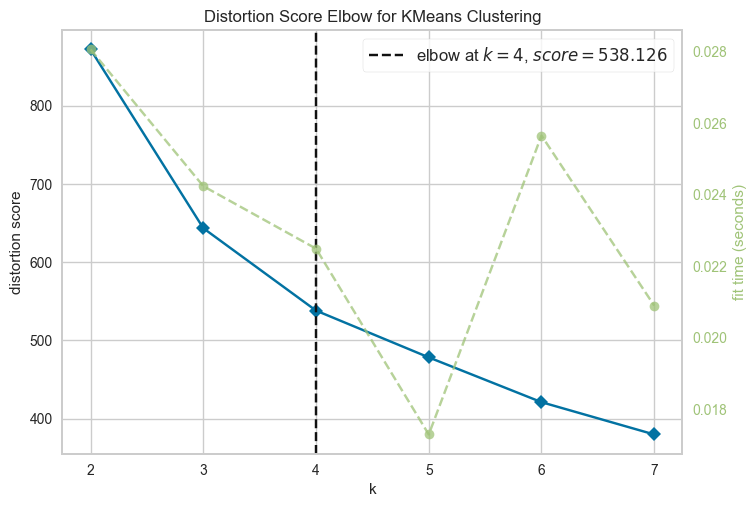

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [557]:
visualizer = KElbowVisualizer(KMeans(random_state=42), k=(2, 8))
visualizer.fit(dt_pca)        
visualizer.show()  

O método Elbow aponta que o valor ideal para o k do K-means com PCA é 4

**<font color='#3CB371'>Silhouette</font>**

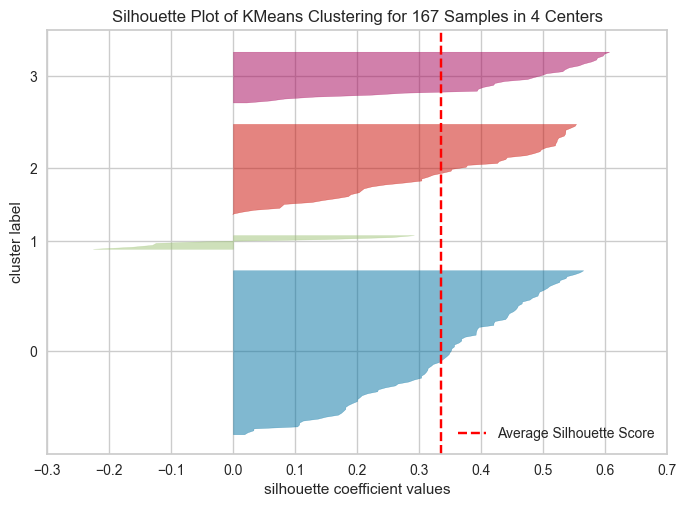

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 167 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [558]:
visualizer = SilhouetteVisualizer(KMeans(n_clusters=4, random_state=42), colors='yellowbrick')
visualizer.fit(dt_pca)        
visualizer.show() 

**<font color='#3CB371'>A análise Silhouette feita no gráfico acima também tem como objetivo selecionar um valor ideal para o número de clusters</font>**.

**<font color='#3CB371'>O valor de 3 clusters parece ser o ideal, pois a pontuação da silhueta para cada cluster está acima da pontuação média da silhueta</font>**.

**<font color='#3CB371'>Assim, pode-se selecionar o número ideal de clusters como 3</font>**.

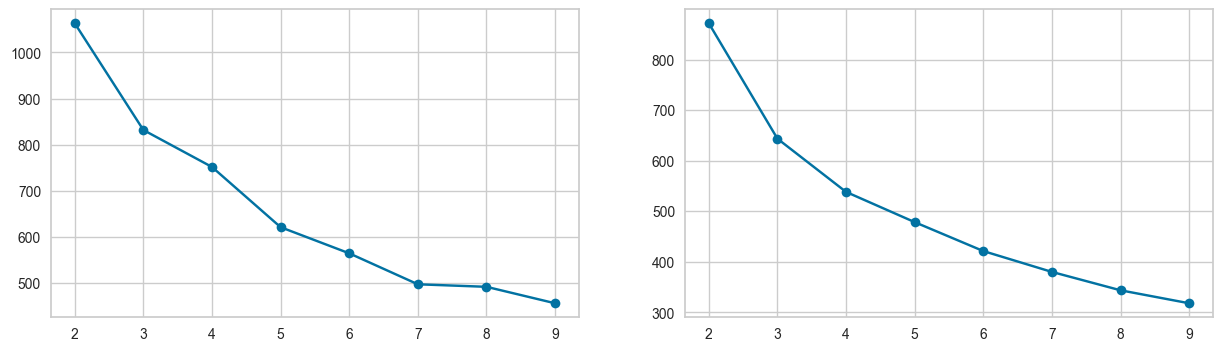

In [559]:
# Escolhendo o melhor número de clusters
# Para ajudar a tomar uma decisão sobre o valor de k podemos usar um gráfico de cotovelo onde o eixo y é uma medida de qualidade de ajuste e o eixo x é o valor de k. 
# Normalmente escolhemos o ponto em que as melhorias no desempenho começam a ficar estagnadas ou piores. Vemos que k = 3 é provavelmente o melhor que podemos fazer sem overfitting. 

from sklearn.metrics import silhouette_score

inercias_sem_pca = []
inercias_com_pca = []
valores_k = []
k_com_pca = []


for k in range(2, 10):
    model_sem_pca = KMeans(n_clusters=k, random_state=42)
    model_sem_pca.fit(X)

    model_com_pca = KMeans(n_clusters=k, random_state=42)
    model_com_pca.fit(dt_pca)
    
    inercias_sem_pca.append(model_sem_pca.inertia_)
    inercias_com_pca.append(model_com_pca.inertia_)
    valores_k.append(k)


fig, ax = plt.subplots(1, 2, figsize=(15,4))

ax[0].plot(valores_k, inercias_sem_pca, marker='o')
ax[1].plot(valores_k, inercias_com_pca, marker='o')
plt.show()

### **<font color='#facb4b'>K-MEANS</font>**

In [560]:
model_com_pca = KMeans(n_clusters=3, random_state=42)
kmeans_pca = model_com_pca.fit(dt_pca)

model_sem_pca = KMeans(n_clusters=3, random_state=42)
kmeans_sem_pca = model_sem_pca.fit(X)

print("COM PCA {} \nSEM PCA {}".format(model_com_pca.inertia_, model_sem_pca.inertia_))


COM PCA 643.4115491664362 
SEM PCA 831.5351582151586


## **<font color='#facb4b'>ANÁLISE DOS RESULTADOS</font>**

Inércia K-means sem PCA: 831.5351582151586

Inércia K-means com PCA: 643.4115491664362

**<font color='#3CB371'>O K-means com PCA obteve uma inércia menor. Portanto, vamos considerar a categorização dos países do K-means com PCA</font>**.

In [561]:
df_pca_kmeans = dt.copy()
df_pca_kmeans["clusters_pca"] = kmeans_pca.labels_
df_pca_kmeans.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters_pca
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0


### **<font color='#facb4b'>IDENTIFICANDO A PRIORIDADE DOS PAÍSES DE CADA CLUSTER</font>**

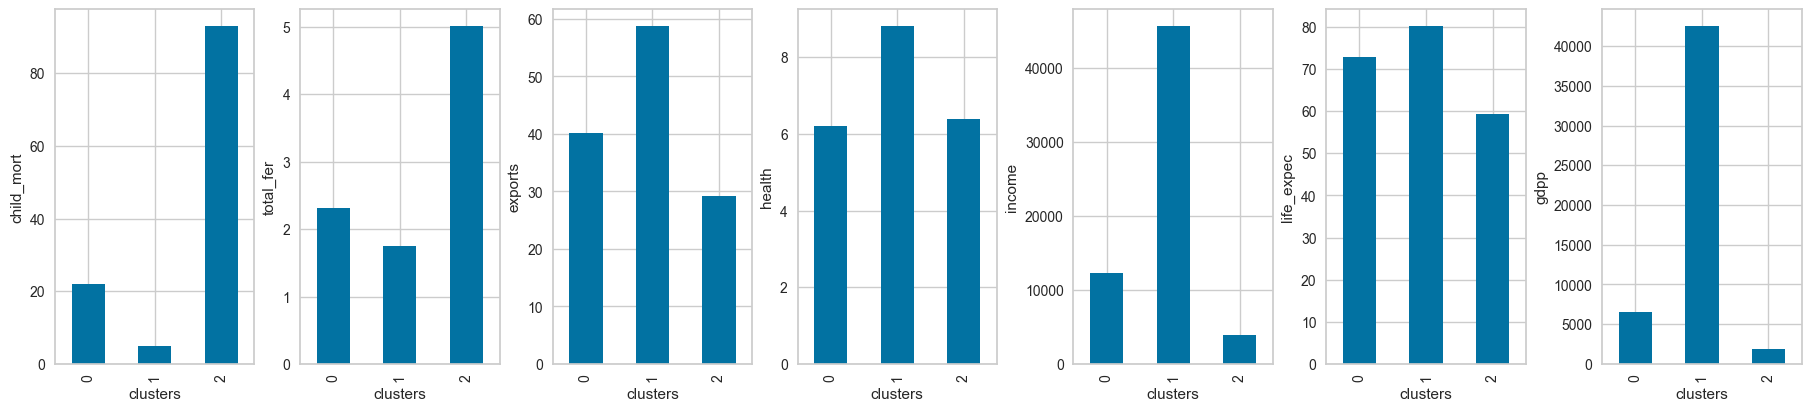

In [562]:
cols = ["child_mort", "total_fer", "exports", "health", "income", "life_expec", "gdpp"]

fig, ax = plt.subplots(ncols=7, figsize=(18,4), constrained_layout=True)

df_pca_kmeans.groupby(['clusters_pca'])["child_mort"].mean().T.plot(kind='bar', ax=ax[0], xlabel="clusters", ylabel="child_mort")
df_pca_kmeans.groupby(['clusters_pca'])["total_fer"].mean().T.plot(kind='bar', ax=ax[1], xlabel="clusters", ylabel="total_fer")
df_pca_kmeans.groupby(['clusters_pca'])["exports"].mean().T.plot(kind='bar', ax=ax[2], xlabel="clusters", ylabel="exports")
df_pca_kmeans.groupby(['clusters_pca'])["health"].mean().T.plot(kind='bar', ax=ax[3], xlabel="clusters", ylabel="health")
df_pca_kmeans.groupby(['clusters_pca'])["income"].mean().T.plot(kind='bar', ax=ax[4], xlabel="clusters", ylabel="income")
df_pca_kmeans.groupby(['clusters_pca'])["life_expec"].mean().T.plot(kind='bar', ax=ax[5], xlabel="clusters", ylabel="life_expec")
df_pca_kmeans.groupby(['clusters_pca'])["gdpp"].mean().T.plot(kind='bar', ax=ax[6], xlabel="clusters", ylabel="gdpp")
plt.show()

Com base nos principais fatores socieconômicos (exports, income e gdpp) e de saúde (child_mort, total_fer, health, life_expec), podemos observar, pelo gráfico, que os países do cluster 2 são os mais carentes de recursos humanitários, pois apresentam:
* a maior taxa de mortalidade infantil
* a maior taxa de filhos que nasceriam de cada mulher
* a menor taxa de exportação de bens e serviços
* a menor renda líquida por pessoa
* a menor taxa de expectativa de vida 
* o menor PIB per capita

### **<font color='#facb4b'>PRIORIDADE DOS PAÍSES DE CADA CLUSTER</font>**

In [563]:
df_pca_kmeans["clusters_labels"] = df_pca_kmeans["clusters_pca"].map({0: "Prioridade 2", 1:"Prioridade 3", 2:"Prioridade 1"}) 

## **<font color='#facb4b'>CONSIDERAÇÕES FINAIS</font>**

### **<font color='#3CB371'>O CEO deve focar nos países pertencentes ao cluster 2 com Prioridade 1.</font>** 

In [564]:
fig = px.choropleth(data_frame=df_pca_kmeans, locationmode= 'country names', locations='country', color=df_pca_kmeans['clusters_labels'], title='Países por categoria que precisam de Ajuda',
color_discrete_map={"Prioridade 3":'blue', "Prioridade 1": 'red', "Prioridade 2": 'orange', "Prioridade 4":'green'},projection='equirectangular',  height=500, width=1200)
fig.show()

### **<font color='#facb4b'>LISTA DE PAÍSES COM PRIORIDADE 1</font>**

In [565]:
df_pca_kmeans[df_pca_kmeans['clusters_labels']=='Prioridade 1'][['country']]

,country
0,Afghanistan
3,Angola
17,Benin
21,Botswana
25,Burkina Faso
26,Burundi
28,Cameroon
31,Central African Republic
32,Chad
36,Comoros


### **<font color='#facb4b'>LISTA DE PAÍSES COM PRIORIDADE 2</font>**

In [566]:
df_pca_kmeans[df_pca_kmeans['clusters_labels']=='Prioridade 2'][['country']]

,country
1,Albania
2,Algeria
4,Antigua and Barbuda
5,Argentina
6,Armenia
...,...
160,Uruguay
161,Uzbekistan
162,Vanuatu
163,Venezuela


### **<font color='#facb4b'>LISTA DE PAÍSES COM PRIORIDADE 3</font>**

In [567]:
df_pca_kmeans[df_pca_kmeans['clusters_labels']=='Prioridade 3'][['country']]

,country
7,Australia
8,Austria
11,Bahrain
15,Belgium
23,Brunei
29,Canada
42,Cyprus
43,Czech Republic
44,Denmark
53,Finland
